# $Classification-Metrics$

- Classification problem
- Breast Cancer Detection - dataset from sklearn datasets
- 

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data and do the train test split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# choose a classification algorithm
from sklearn.linear_model import LogisticRegression

# bring the model evaluation metrics
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, 
                             precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve
                             )

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
# Load the data
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns= data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
df['cancer'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


```
a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)```

In [89]:
# df.info()

In [90]:
# df.isnull().sum()
# df.describe()

In [91]:
# modeling - choose a model
model = LogisticRegression(max_iter=1000)

# training
# feature selection
# break into input features and target features
# X , y = data.data, data.target
X , y = df.drop('cancer', axis = 1), df['cancer']

In [92]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

# train the model on dataset
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## Evaluate the results


1. **Confusion Matrix**
    - A matrix of Actual vs Predicted Results
    - You understand how many TP, FP, TN, FN there are
2. **Core Classification Metrics**
    - Accuracy, Precision, Recall and F1 Score
3. **Classification Report**
    - shows all the metrics at once
4. **Threshold Based Evaluation**
    - we plot the ROC - AUC 
    - these are characterists plot the True Positive Rate (Recall) vs False Positive Rate

    
5. Cross- Validation
    - K-Fold Cross validation
    - We split our dataset, we avearge the performance using these splits

### Learn about implementaion in Python

In [93]:
# make the predictions first
y_pred = model.predict(X_test)

#### Confusion Matrix
- A confusion matrix is a table used to evaluate the performance of a classification model. 
- It provides a detailed breakdown of the model's predictions compared to the actual outcomes, helping to identify where the model is making errors. 
- The matrix is particularly useful for binary and multi-class classification problems.

In [94]:
print('===============Confusion Matrix=================\n')
cm = confusion_matrix(y_test, y_pred)
print(cm)

===============Confusion Matrix=================

[[39  4]
 [ 1 70]]


![](https://media.datacamp.com/legacy/v1701364260/image_5baaeac4c0.png)

### Core metrics, based on confusion matrix

- [Classification metrics](https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall)

In [95]:
print('===============Accuracy Score=================\n')
print(round(accuracy_score(y_test, y_pred),2))

print('===============Precision Score=================\n')
print(round(precision_score(y_test, y_pred),2))

print('===============Recall Score=================\n')
print(round(recall_score(y_test, y_pred),2))

print('===============F1 Score=================\n')
print(round(f1_score(y_test, y_pred),2))

# classification report
print('===============Classification Report =================\n')
print(classification_report(y_test, y_pred))

===============Accuracy Score=================

0.96
===============Precision Score=================

0.95
===============Recall Score=================

0.99
===============F1 Score=================

0.97
===============Classification Report =================

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 1.0, 'Confusion Matrix')

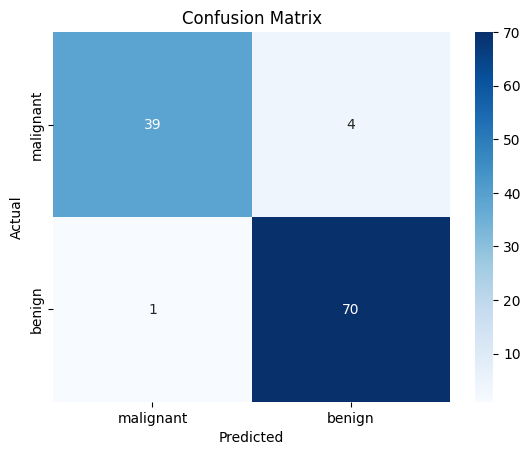

In [96]:
sns.heatmap(cm, cmap= 'Blues', annot= True, xticklabels= data.target_names, yticklabels= data.target_names)
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title('Confusion Matrix')

### AUC-ROC curves
- [Learn Here](https://www.geeksforgeeks.org/machine-learning/auc-roc-curve/)

- AUC-ROC evaluates a model’s ability to distingish between classes across all possible threshold. 
- It discriminates between positive and negative classes across various decision thresholds. 
- The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different thresholds:

    - TPR : TP / TP + FN

    - FPR: FP / FP + TN​
- 
- The higher the curve the better the model is at making correct predictions
- How it is an evaluation metric:
    - ROC means Reciever Operating Characteric
    - 
- simple analogy:
    - metal detector on a beach
    - Low sensitivity - Detector will beep only for LARGE or BIG metal objects
    - High sensitivity - beeps on ANY kind of metal object
    - ROC curve will show the performance across every sensitivity setting

- X - axis :
    - FPR 
    - how many false alarms 
    - bad thing
- Y - axis:
    - TPR - sensitivity
    - how many were correct detections
    - good thing
    - higher the curve goes, the better the performance gets



ROC Curve : It plots TPR vs. FPR at different thresholds. 

It represents the trade-off between the **sensitivity** and **specificity** of a classifier.

AUC(Area Under the Curve): measures the area under the ROC curve. 

A higher AUC value indicates better model performance as it suggests a greater ability to distinguish between classes. 

An AUC value of 1.0 indicates perfect performance while 0.5 suggests it is random guessing.

**Sensitivity** (also called **Recall** or **True Positive Rate**) is a metric that measures 
- how well a model identifies actual positive cases.

It answers the question:
- "Out of all the actual positives, how many did the model correctly predict as positive?"

The false positive rate (FPR) is the proportion of all actual negatives that were classified incorrectly as positives, also known as the probability of false alarm

In [97]:
y_probs = model.predict_proba(X_test)
# y_probs
# y_probs[:,1]

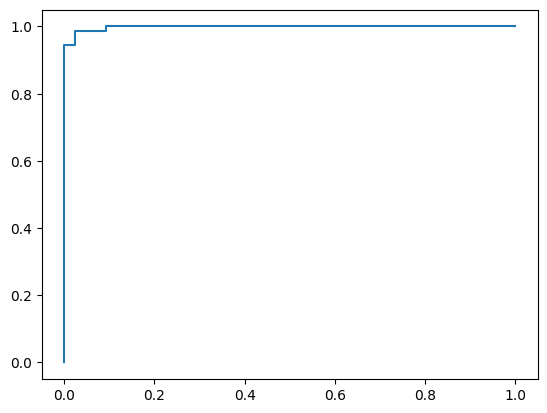

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:,1])
plt.plot(fpr,tpr)

In [99]:
print("AUC score: ",roc_auc_score(y_test, y_probs[:,1]))

AUC score:  0.9977071732721914


### Cross Validation

- 

In [100]:
from sklearn.model_selection import cross_val_score, train_test_split

# we are training our model in a specific way this time
cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring= 'accuracy') # you an check any metric scores from here

# CV score
cv_score

array([0.97802198, 0.93406593, 0.96703297, 0.95604396, 0.91208791])